# Los Angeles Earthquake Magnitude Classification

In this notebook we use the Los Angeles Earthquake Dataset to classify the class of earthquakes as defined by the Southern California Earthquake Data Center (SCEDC). The dataset contains information from January 1, 2012 to September 1, 2024 and was found on Kaggle.com.

We plan on classifying the data using three different models: logistic regression, support vector machine (SVM), and neural networks.

**Dataset :** [Los Angeles Earthquake dataset](https://www.kaggle.com/datasets/batuhankalem/los-angeles-earthquake-dataset/data)

## Preprocessing

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split, cross_val_score  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # 
from sklearn import datasets, linear_model
from sklearn import linear_model

### Importing the data

In [161]:
# read the data and split the data into X and y
df = pd.read_csv('LosAngeles_Earthquake_Dataset-removed-0s.csv', delimiter=',')
feature_names = df[:0].columns


In [162]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22560 entries, 0 to 22559
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        22560 non-null  float64
 1   longitude                       22560 non-null  float64
 2   clustering_coefficient_30_days  22560 non-null  float64
 3   std_mag_30_days                 22560 non-null  float64
 4   rolling_mean_depth_30_days      22560 non-null  float64
 5   earthquakes_last_30_days        22560 non-null  int64  
 6   b_value                         22560 non-null  float64
 7   b_value_increment_i_i2          22560 non-null  float64
 8   b_value_increment_i2_i4         22560 non-null  float64
 9   b_value_increment_i4_i6         22560 non-null  float64
 10  b_value_increment_i6_i8         22560 non-null  float64
 11  b_value_increment_i8_i10        22560 non-null  float64
 12  max_mag_last_week               

,latitude,longitude,clustering_coefficient_30_days,std_mag_30_days,rolling_mean_depth_30_days,earthquakes_last_30_days,b_value,b_value_increment_i_i2,b_value_increment_i2_i4,b_value_increment_i4_i6,b_value_increment_i6_i8,b_value_increment_i8_i10,max_mag_last_week,eta,delta_M,elapsed_time,coefficient_of_variation,dE1_2,mag,class
count,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,2.256000e+04,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,2.256000e+04,22560.000000,2.256000e+04,22560.000000,22560.000000
mean,34.098200,-117.774406,0.866124,0.519413,9.604852,189.514229,0.566605,-0.000038,-4.229818e-05,-0.000040,0.000007,0.000038,2.011582,0.183598,-1.503916,8.577594e+05,1.178257,1.030400e+05,1.242844,2.766312
std,0.217868,0.557548,0.047046,0.068517,1.686750,169.383933,0.123334,0.036503,5.141092e-02,0.062720,0.072224,0.080384,0.596932,0.012151,0.774870,3.851648e+05,0.287685,2.551393e+05,0.533198,1.371892
min,33.191833,-119.320667,0.000000,0.000000,0.000000,0.000000,0.293007,-0.421920,-4.418203e-01,-0.450243,-0.460616,-0.455649,0.760000,0.159844,-4.692859,3.827500e+03,0.696293,1.229661e+04,-0.340000,1.000000
25%,34.001333,-118.135750,0.832248,0.469151,9.147655,122.000000,0.478912,-0.009485,-1.567671e-02,-0.021010,-0.026216,-0.031273,1.600000,0.174238,-1.970766,6.766993e+05,1.005825,2.896820e+04,0.880000,2.000000
50%,34.054167,-117.538417,0.857247,0.508384,9.985026,143.000000,0.555215,0.000124,-1.110000e-16,0.000139,0.000273,0.000264,1.910000,0.181130,-1.453130,8.875700e+05,1.120798,4.332824e+04,1.130000,3.000000
75%,34.207833,-117.313000,0.890450,0.560526,10.516310,178.000000,0.642068,0.009799,1.625191e-02,0.021854,0.027422,0.032245,2.320000,0.190707,-0.999805,1.095103e+06,1.272087,7.783336e+04,1.510000,4.000000
max,34.942167,-117.158333,0.992260,0.765815,15.568651,1227.000000,1.117587,0.420602,4.704251e-01,0.473283,0.474226,0.474092,5.496776,0.236607,1.157047,2.365254e+06,6.284059,3.337624e+06,5.496776,6.000000


##### Before we do any analysis on the data, we will first separate our target from the dataset so it doesn't get considered in principle component analysis.
We also reshape y to be a 2d array for future computation purposes.

In [163]:
data = df.to_numpy()
X = data[:,:19]
y = data[:,19]

y = y.reshape(-1,1) # reshape y to be a 2d array bc/ X was already 2d, but y was one column
print("X has shape: ", X.shape)
print("y has shape: ", y.shape)

X has shape:  (22560, 19)
y has shape:  (22560, 1)


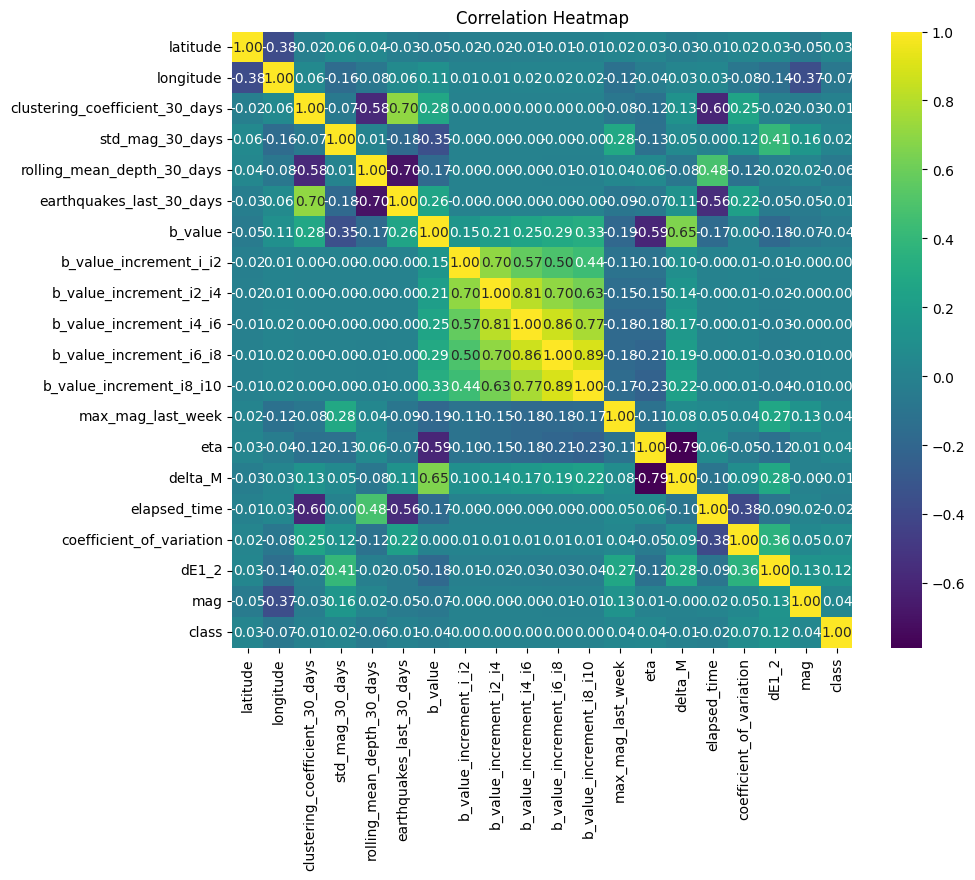

In [164]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### We will then scale our data to ensure PCA does not favor certain features over others.

In [165]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

##### We will now do Principle Component Analysis (PCA)

In [166]:
pca = PCA()
data = pca.fit_transform(scaled_data)

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

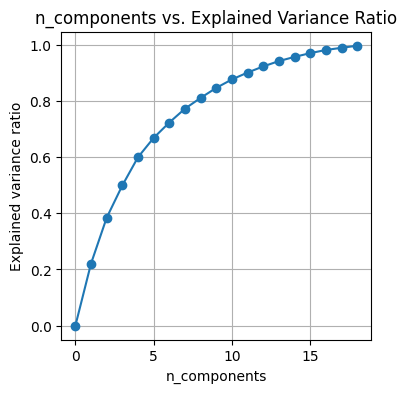

In [167]:
var_ratio = []
num_components = np.arange(data.shape[1])
for num in num_components:
    pca = PCA(n_components=num)
    pca.fit(scaled_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,4))
plt.grid(True)
plt.plot(num_components,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [168]:
pca = PCA(n_components=10)
pca.fit(scaled_data)
print("The explained variance ratio when reducing the number of components to 10 is: \n",np.sum(pca.explained_variance_ratio_))

The explained variance ratio when reducing the number of components to 10 is: 
 0.8758817544394876


After conducting PCA on our dataset, we have come to the conclusion that PCA is not necessary for our purposes. We would like to be able to see how specific features influence our predictions, and reducing the number of features would mean that we lose the features and their names. 

The heatmap we plotted above also shows that there is little correlation between most of our features. 20 features is also a moderate amount of features, and may not need reduction. While reducing the number of features down to 10 changes the explained variance ratio to 0.876.  

While this does mean that we can confidently reduce the number of features in our dataset (to 13 or 14) without losing a large amount of information, we do not wish to lose the names of our features and are willing to deal with the consequences.

### Splitting the data

Our dataset originally had 22,899 data points and 19 features, but after removing rows with missing values, we ended up with 22,561 data points. We will be using the magnitude feature as our target feature.

Given the size of the dataset, we believe that it is possible to retain the same significant patterns if we were to reduce the dataset's size by randomly sampling a section of it to use for the rest of the project. When taking our computation time/resources into account, we did not find it necessary to use all 22561 data points in our testing, training, and validation.

We decided to only use **3000 randomly chosen data samples**.

Text(0.5, 1.0, 'Frequency of Different Classes in the Full Set')

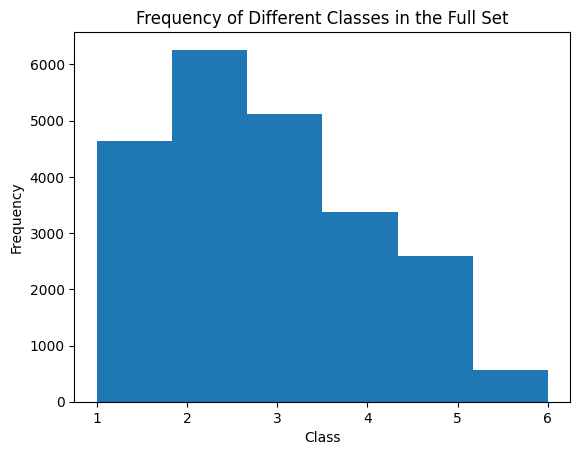

In [169]:
all_data = df.to_numpy()
y = all_data[:,19]
y = y.reshape(-1,1)
plt.hist(y, bins=6)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Different Classes in the Full Set')

In [170]:
data = df.to_numpy()
np.random.shuffle(data)
data = data[:3000, :]
X = data[:,:19]
y = data[:,19]
X = scaler.fit_transform(X)
y = y.reshape(-1,1)

Text(0.5, 1.0, 'Frequency of Different Classes in the Smaller Set')

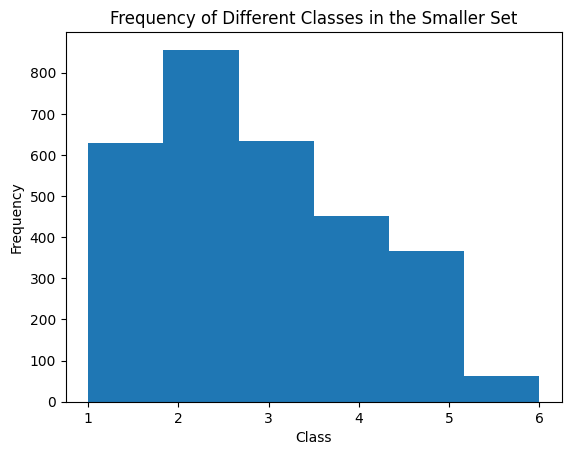

In [171]:
# print(y.shape)
plt.hist(y, bins=6)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Different Classes in the Smaller Set')

Here we split the data into training and test sets. We use approximately 20% of the data for the test data and 20% for the validation data. The other 60% will be for training.

In [172]:

X_tr, X_test_val, y_tr, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)
print("X_tr (train) has shape: ", X_tr.shape)
print("y_tr (train) has shape: ", y_tr.shape, "\n")


# need to split the 40% test data into 20% test and 20% validation data
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)


# halve the X_test_val set into X_test and X_val
X_test = X_test_val[:(X_test_val.shape[0] // 2),:]
y_test = y_test_val[:(y_test_val.shape[0] // 2),:]
print("X_test has shape: ", X_test.shape)
print("y_test has shape: ", y_test.shape, "\n")

X_val = X_test_val[(X_test_val.shape[0] // 2):,:]
y_val = y_test_val[(y_test_val.shape[0] // 2):,:]
print("X_val has shape: ", X_val.shape)
print("y_val has shape: ", y_val.shape)


X_tr (train) has shape:  (1800, 19)
y_tr (train) has shape:  (1800, 1) 

X_test has shape:  (600, 19)
y_test has shape:  (600, 1) 

X_val has shape:  (600, 19)
y_val has shape:  (600, 1)


We should now analyze data patterns (do we need to do pca? we have a lot of features...)

First, we'll analyze whether the # of earthquakes in the last 30 days influences the magnitude

Then we can look at frequencies of longitude and latitude (together? how would we do two variables against one)

If possible, I'd like to look at longitude and latitude with magnitude

Perhaps delta m - Difference between the largest observed and expected magnitudes.

Also, b_value as a histogram

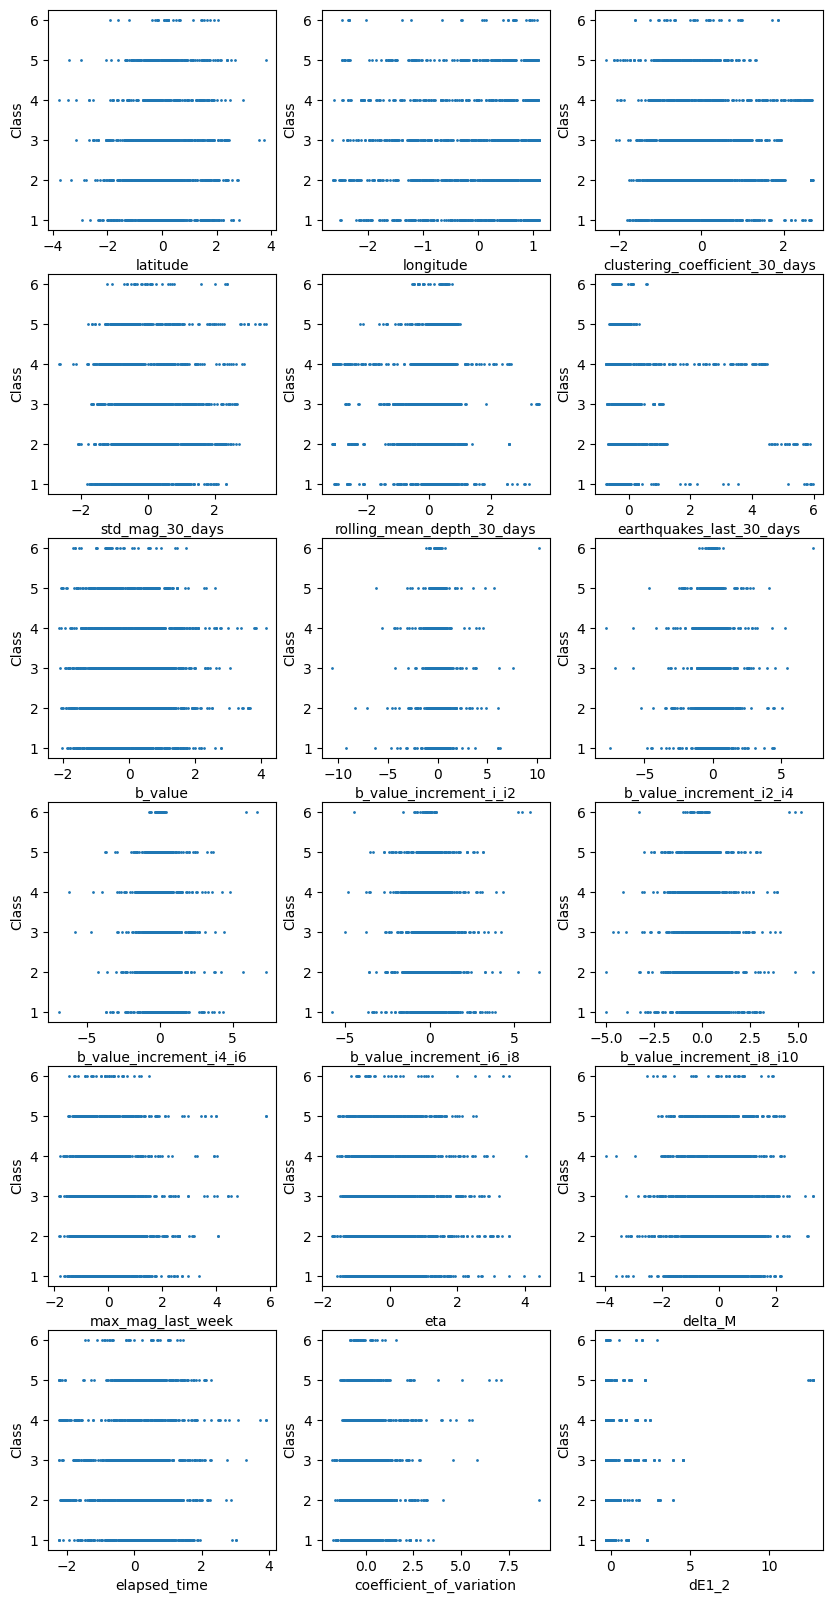

In [173]:
fig, axs = plt.subplots(6, 3, figsize=(10,20)) 
for i in range (0,6):
   for j in range (0,3):
       axs[i, j].scatter(X_tr[:,i*3+j],y_tr, s=1)
    #    axs[i, j].stem(X_tr[:,i*3+j],y_tr, s=1)
       axs[i, j].set_xlabel(feature_names[i*3+j])
for ax in axs.flat:
    ax.set( ylabel='Class')

# Polynomial Transformation

In [174]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_transformation = PolynomialFeatures(degree = 2)

X_train_polynomial = polynomial_transformation.fit_transform(X_tr)
X_test_polynomial = polynomial_transformation.transform(X_test)

#transform the data to fit the model
X_train_polynomial = scaler.fit_transform(X_train_polynomial)
X_test_polynomial = scaler.fit_transform(X_test_polynomial)
y_train = y_tr.ravel()

# Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

#Create the logistic regression model
logreg = LogisticRegression(solver = 'saga', multi_class = 'multinomial', penalty = 'l1')

#define variables for use in logistic regression section
X_train = X_tr
y_train = y_tr.ravel()

logreg.fit(X_train,y_train)

#predict the data and calculate the accuracy
yhat_train = logreg.predict(X_train)
yhat_test = logreg.predict(X_test)

train_score = logreg.score(X_train, y_tr)
test_score = logreg.score(X_test, y_test)

print("Test data accuracy: ", test_score)
print("Training data accuracy: ", train_score)

prec, recal, fscore, sup = precision_recall_fscore_support(y_test, yhat_test)

print('prec: ', prec)
print('recal: ', recal)
print('fscore: ', fscore)


Test data accuracy:  0.32666666666666666
Training data accuracy:  0.3472222222222222
prec:  [0.3006135  0.32128514 0.29661017 0.5        0.2        0.        ]
recal:  [0.38888889 0.50632911 0.26923077 0.30927835 0.02816901 0.        ]
fscore:  [0.33910035 0.39312039 0.28225806 0.38216561 0.04938272 0.        ]


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

#Create the logistic regression model
logreg = LogisticRegression(solver = 'saga', multi_class = 'multinomial', penalty = 'l2')

logreg.fit(X_train,y_train)

#predict the data and calculate the accuracy
yhat_train = logreg.predict(X_train)
yhat_test = logreg.predict(X_test)

train_score = logreg.score(X_train, y_tr)
test_score = logreg.score(X_test, y_test)

print("Test data accuracy: ", test_score)
print("Training data accuracy: ", train_score)


prec, recal, fscore, sup = precision_recall_fscore_support(y_test, yhat_test)

print('prec: ', prec)
print('recal: ', recal)
print('fscore: ', fscore)


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test data accuracy:  0.32
Training data accuracy:  0.34833333333333333
prec:  [0.29166667 0.32644628 0.28070175 0.484375   0.08333333 0.        ]
recal:  [0.38888889 0.5        0.24615385 0.31958763 0.01408451 0.        ]
fscore:  [0.33333333 0.395      0.26229508 0.38509317 0.02409639 0.        ]


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Logistic Regression with Polynomial Transformation

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

C_values = [0.001, 0.01, 0.1, 1.0, 10, 100]
Train_accuracy = []
Test_accuracy = []

for c in C_values:

    #Create the logistic regression model
    logreg = LogisticRegression(solver = 'saga', multi_class = 'multinomial', penalty = 'l1', C = c)

    logreg.fit(X_train_polynomial,y_train)

    #predict the data and calculate the accuracy
    yhat_train = logreg.predict(X_test_polynomial)
    yhat_test = logreg.predict(X_test_polynomial)

    train_score = logreg.score(X_train_polynomial, y_tr)
    test_score = logreg.score(X_test_polynomial, y_test)

    Train_accuracy.append(train_score)
    Test_accuracy.append(test_score)

    # print("Test data accuracy: ", test_score)
    # print("Training data accuracy: ", train_score)

    prec, recal, fscore, sup = precision_recall_fscore_support(y_test, yhat_test)

    # print('prec: ', prec)
    # print('recal: ', recal)
    # print('fscore: ', fscore)
print("Train Accuracy: ", Train_accuracy)
print("Test Accuracy: ", Test_accuracy)


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\selin

Train Accuracy:  [0.28055555555555556, 0.31222222222222223, 0.4638888888888889, 0.5166666666666667, 0.5205555555555555, 0.5205555555555555]
Test Accuracy:  [0.2633333333333333, 0.305, 0.37, 0.35, 0.3516666666666667, 0.35333333333333333]


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

#Create the logistic regression model
logreg = LogisticRegression(solver = 'saga', multi_class = 'multinomial', penalty = 'l2')

#transform the data to fit the model
X_train_polynomial = scaler.fit_transform(X_train_polynomial)
X_test_polynomial = scaler.fit_transform(X_test_polynomial)
y_train = y_tr.ravel()

logreg.fit(X_train_polynomial,y_train)

#predict the data and calculate the accuracy
yhat_train = logreg.predict(X_test_polynomial)
yhat_test = logreg.predict(X_test_polynomial)

train_score = logreg.score(X_train_polynomial, y_tr)
test_score = logreg.score(X_test_polynomial, y_test)

print("Test data accuracy: ", test_score)
print("Training data accuracy: ", train_score)

prec, recal, fscore, sup = precision_recall_fscore_support(y_test, yhat_test)

print('prec: ', prec)
print('recal: ', recal)
print('fscore: ', fscore)


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test data accuracy:  0.3516666666666667
Training data accuracy:  0.5194444444444445
prec:  [0.26984127 0.32520325 0.3559322  0.66129032 0.27659574 1.        ]
recal:  [0.26984127 0.50632911 0.32307692 0.42268041 0.18309859 0.05555556]
fscore:  [0.26984127 0.3960396  0.33870968 0.51572327 0.22033898 0.10526316]


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# SVMs

We will be using the radial-basis function (RBF), polynomial, and sigmoid kernel functions.

First, for ease of code, we will define a function for accuracy reporting.

In [190]:
def svm_predict_report(X_test, y_test, svm_model):
    y_pred = svm_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    prec, recal, fscore, sup = precision_recall_fscore_support(y_test, y_pred)
    print('prec: ', prec)
    print('recal: ', recal)
    print('fscore: ', fscore)

We will test the three SVM kernels with C-values of 1.0 in order to get an idea of which transformations give a higher accuracy in general.

### SVC when C=1.0

In [222]:
kernel_types = ['rbf', 'poly', 'sigmoid']
for k_type in kernel_types:
    print("\nThe", k_type,"kernel function has accuracy:")
    svm_model = SVC(kernel=k_type, C=1.0)
    svm_model.fit(X_tr, np.ravel(y_tr))
    svm_predict_report(X_test,y_test,svm_model)



The rbf kernel function has accuracy:
Accuracy: 0.365
prec:  [0.28930818 0.31849315 0.41584158 0.8        0.66666667 0.        ]
recal:  [0.36507937 0.58860759 0.32307692 0.37113402 0.02816901 0.        ]
fscore:  [0.32280702 0.41333333 0.36363636 0.50704225 0.05405405 0.        ]

The poly kernel function has accuracy:
Accuracy: 0.34833333333333333
prec:  [0.31914894 0.29613734 0.51162791 0.85294118 0.44444444 1.        ]
recal:  [0.11904762 0.87341772 0.16923077 0.29896907 0.05633803 0.05555556]
fscore:  [0.1734104  0.44230769 0.25433526 0.44274809 0.1        0.10526316]

The sigmoid kernel function has accuracy:


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.22166666666666668
prec:  [0.22110553 0.2962963  0.19727891 0.25373134 0.05882353 0.        ]
recal:  [0.34920635 0.15189873 0.22307692 0.35051546 0.02816901 0.        ]
fscore:  [0.27076923 0.20083682 0.20938628 0.29437229 0.03809524 0.        ]


Get the training accuracy

In [223]:
kernel_types = ['rbf', 'poly', 'sigmoid']
for k_type in kernel_types:
    print("\nThe", k_type,"kernel function has accuracy:")
    svm_model = SVC(kernel=k_type, C=1.0)
    svm_model.fit(X_tr, np.ravel(y_tr))
    svm_predict_report(X_tr,y_tr,svm_model)



The rbf kernel function has accuracy:
Accuracy: 0.535
prec:  [0.5        0.45614035 0.62418301 0.91935484 0.87878788 1.        ]
recal:  [0.5535248  0.82376238 0.49354005 0.41758242 0.13242009 0.03030303]
fscore:  [0.52540273 0.58715596 0.55122655 0.5743073  0.23015873 0.05882353]

The poly kernel function has accuracy:
Accuracy: 0.49666666666666665
prec:  [0.74829932 0.36935603 0.87313433 1.         1.         1.        ]
recal:  [0.28720627 0.98811881 0.30232558 0.43956044 0.19178082 0.18181818]
fscore:  [0.41509434 0.53771552 0.44913628 0.61068702 0.32183908 0.30769231]

The sigmoid kernel function has accuracy:
Accuracy: 0.21944444444444444
prec:  [0.24422442 0.32592593 0.16666667 0.19321149 0.13541667 0.        ]
recal:  [0.38642298 0.17425743 0.18604651 0.27106227 0.05936073 0.        ]
fscore:  [0.29929221 0.22709677 0.17582418 0.22560976 0.08253968 0.        ]


### PCA Feature Reduction with RBF Kernel Function

We were interested in seeing how feature reduction would affect the accuracies of the SVM. Since the RBF kernel function has the highest base accuracy of the three functions we use, we decided to try PCA feature reduction with the RBF kernel function to see if any interesting patterns arose.

In [205]:
def pca_accuracy(num_comp):
    print("\n NOW USING n_components: ", num_comp)
    pca = PCA(n_components=num_comp)
    X_tr_pca = pca.fit_transform(X_tr)
    X_test_pca = pca.fit_transform(X_test)

    svm_model_pca = SVC(kernel='rbf', C=1.0)
    svm_model_pca.fit(X_tr_pca, np.ravel(y_tr))
    # svm_predict_report(X_test_pca,y_test,svm_model_pca)

    y_pred = svm_model_pca.predict(X_test_pca)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred)
    


 NOW USING n_components:  10
Accuracy: 0.2816666666666667

 NOW USING n_components:  11
Accuracy: 0.2833333333333333

 NOW USING n_components:  12
Accuracy: 0.2783333333333333

 NOW USING n_components:  13
Accuracy: 0.295

 NOW USING n_components:  14
Accuracy: 0.30666666666666664

 NOW USING n_components:  15
Accuracy: 0.275

 NOW USING n_components:  16
Accuracy: 0.26666666666666666

 NOW USING n_components:  17
Accuracy: 0.2683333333333333

 NOW USING n_components:  18
Accuracy: 0.26666666666666666

 NOW USING n_components:  19
Accuracy: 0.26666666666666666


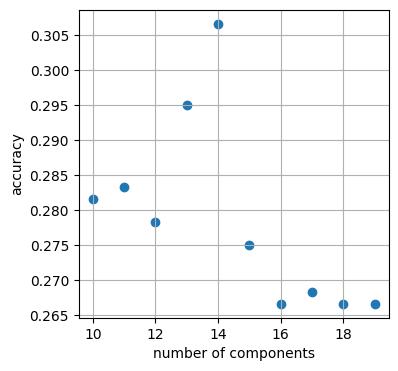

In [209]:
pca_acc_x_vals = []
pca_acc_y_vals = []
for i in range(10,20):
    acc = pca_accuracy(i)
    pca_acc_x_vals.append(i)
    pca_acc_y_vals.append(acc)

plt.figure(figsize=(4, 4))
plt.scatter(pca_acc_x_vals, pca_acc_y_vals)
plt.xlabel('number of components')
plt.ylabel('accuracy')
plt.grid()
plt.show()

### Regularization

We will now find the best values for C when creating our SVC models.

We do not use any feature reduction in the upcoming sections.

In [218]:
def find_best_C(model_name, X, y):
    c_values = np.linspace(0.1, 5, 10)
    best_e_cv = -1
    best_c_val = -1
    
    e_cv_vals = []

    for c in c_values:
        svm_model = SVC(kernel=model_name,C=c)
        print("\n\nUsing c = ", c)
        val_errors = cross_val_score(svm_model, X, np.ravel(y), cv=5, scoring='accuracy')
        # print("validation errors:\n", val_errors)

        e_cv = np.mean(val_errors)
        e_cv_vals.append(e_cv)
        print("e_cv:\n", e_cv)
        if e_cv > best_e_cv:
            # print("\nnew best cross val error: ", e_cv)
            best_e_cv = e_cv
            best_c_val = c
    
    plt.figure(figsize=(5, 4))
    plt.scatter(c_values, e_cv_vals)
    plt.xlabel('c value')
    plt.ylabel('val error')
    plt.grid(True)
    plt.show()

    return best_c_val, best_e_cv

### Finding the best C value for an RBF kernel SVM

Using an RBF kernel SVM


Using c =  0.1
e_cv:
 0.29166666666666663


Using c =  0.6444444444444445
e_cv:
 0.36777777777777776


Using c =  1.188888888888889
e_cv:
 0.3955555555555556


Using c =  1.7333333333333336
e_cv:
 0.4011111111111111


Using c =  2.277777777777778
e_cv:
 0.4105555555555555


Using c =  2.8222222222222224
e_cv:
 0.4133333333333333


Using c =  3.366666666666667
e_cv:
 0.4155555555555555


Using c =  3.911111111111112
e_cv:
 0.4227777777777778


Using c =  4.455555555555556
e_cv:
 0.42388888888888887


Using c =  5.0
e_cv:
 0.42222222222222217


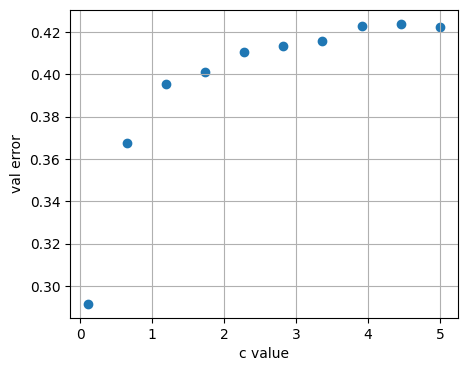

... aaaand the winner is: c =  4.455555555555556  with a cross-val error of  0.42388888888888887
Accuracy: 0.4216666666666667
prec:  [0.33908046 0.37837838 0.46902655 0.75862069 0.375      1.        ]
recal:  [0.46825397 0.53164557 0.40769231 0.45360825 0.16901408 0.05555556]
fscore:  [0.39333333 0.44210526 0.43621399 0.56774194 0.23300971 0.10526316]


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [219]:
print("Using an RBF kernel SVM")
best_c, best_cv = find_best_C('rbf', X_tr, y_tr)
print("... aaaand the winner is: c = ",best_c," with a cross-val error of ", best_cv)

svm_model_rbf = SVC(kernel='rbf', C=best_c)
svm_model_rbf.fit(X_tr, y_tr)
svm_predict_report(X_test,np.ravel(y_test),svm_model_rbf)


### Finding the best C value for an Polynomial kernel SVM

Using an POLYNOMIAL kernel SVM


Using c =  0.1
e_cv:
 0.31555555555555553


Using c =  0.6444444444444445
e_cv:
 0.35333333333333333


Using c =  1.188888888888889
e_cv:
 0.36111111111111116


Using c =  1.7333333333333336
e_cv:
 0.3672222222222222


Using c =  2.277777777777778
e_cv:
 0.36888888888888893


Using c =  2.8222222222222224
e_cv:
 0.36944444444444446


Using c =  3.366666666666667
e_cv:
 0.36944444444444446


Using c =  3.911111111111112
e_cv:
 0.36944444444444446


Using c =  4.455555555555556
e_cv:
 0.3711111111111111


Using c =  5.0
e_cv:
 0.3705555555555556


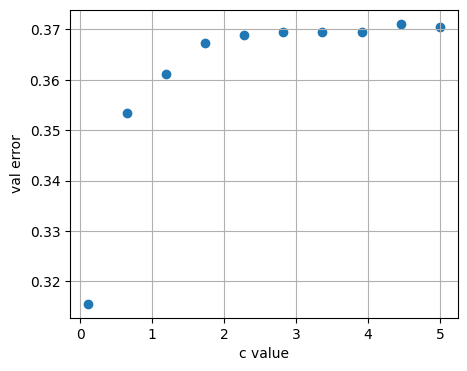

... aaaand the winner is: c =  4.455555555555556  with a cross-val error of  0.3711111111111111
Accuracy: 0.38333333333333336
prec:  [0.29       0.33240997 0.515625   0.77272727 0.46428571 0.33333333]
recal:  [0.23015873 0.75949367 0.25384615 0.35051546 0.18309859 0.05555556]
fscore:  [0.25663717 0.46242775 0.34020619 0.4822695  0.26262626 0.0952381 ]


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [220]:
print("Using an POLYNOMIAL kernel SVM")
best_c, best_cv = find_best_C('poly', X_tr, y_tr)
print("... aaaand the winner is: c = ",best_c," with a cross-val error of ", best_cv)

svm_model_poly = SVC(kernel='poly', C=best_c)
svm_model_poly.fit(X_tr, y_tr)
svm_predict_report(X_test,np.ravel(y_test),svm_model_poly)


### Finding the best C value for an Sigmoid kernel SVM

Using an SIGMOID kernel SVM


Using c =  0.1
e_cv:
 0.2833333333333333


Using c =  0.6444444444444445
e_cv:
 0.2538888888888889


Using c =  1.188888888888889
e_cv:
 0.23111111111111113


Using c =  1.7333333333333336
e_cv:
 0.2238888888888889


Using c =  2.277777777777778
e_cv:
 0.2261111111111111


Using c =  2.8222222222222224
e_cv:
 0.2227777777777778


Using c =  3.366666666666667
e_cv:
 0.22000000000000003


Using c =  3.911111111111112
e_cv:
 0.22166666666666668


Using c =  4.455555555555556
e_cv:
 0.2188888888888889


Using c =  5.0
e_cv:
 0.22722222222222221


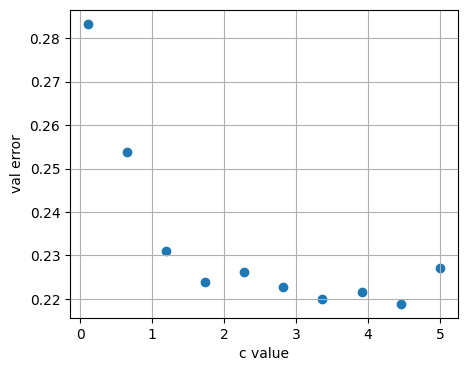

... aaaand the winner is: c =  0.1  with a cross-val error of  0.2833333333333333
Accuracy: 0.26166666666666666
prec:  [0.         0.26315789 1.         0.2        0.         0.        ]
recal:  [0.         0.98101266 0.00769231 0.01030928 0.         0.        ]
fscore:  [0.         0.41499331 0.01526718 0.01960784 0.         0.        ]


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [221]:
print("Using an SIGMOID kernel SVM")
best_c, best_cv = find_best_C('sigmoid', X_tr, y_tr)
print("... aaaand the winner is: c = ",best_c," with a cross-val error of ", best_cv)

svm_model_sigmoid = SVC(kernel='sigmoid', C=best_c)
svm_model_sigmoid.fit(X_tr, y_tr)
svm_predict_report(X_test,np.ravel(y_test),svm_model_sigmoid)


# Neural Networks

The first step to create a neural network model is to adjust our y data. Since we are classifying each earthquake on a scale of 1 to 6 we need to adjust our data to one-hot-encode the y values.

### One-Hot Encoding y

In [ ]:
y_tr = y_tr.astype(int)
y_encoded_training = np.zeros((len(y_tr),7))
for i in range(len(y_tr)):
    y_encoded_training[i, y_tr[i]] = 1

y_test = y_test.astype(int)
y_encoded_test = np.zeros((len(y_test),7))
for i in range(len(y_test)):
    y_encoded_test[i, y_test[i]] = 1


### Neural Network with 1 hidden layer

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_train, y_encoded_training), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_train, y_encoded_training)
print(f"Training Data Accuracy: {test_accuracy:.4f}")


Epoch 1/50


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1543 - loss: 1.9438 - val_accuracy: 0.3167 - val_loss: 1.6741
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3192 - loss: 1.6524 - val_accuracy: 0.3439 - val_loss: 1.5995
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3323 - loss: 1.6022 - val_accuracy: 0.3439 - val_loss: 1.5646
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3248 - loss: 1.5693 - val_accuracy: 0.3778 - val_loss: 1.5399
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3639 - loss: 1.5609 - val_accuracy: 0.3772 - val_loss: 1.5203
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3898 - loss: 1.5072 - val_accuracy: 0.3867 - val_loss: 1.5021
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3894 - loss: 1.5161 - val_accuracy: 0.3922 - val_loss: 1.4871
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3980 - loss: 1.4835 - val_accuracy: 0.4044 - val_loss: 1.4681
Epo

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1709 - loss: 1.9670 - val_accuracy: 0.2900 - val_loss: 1.7149
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2851 - loss: 1.6956 - val_accuracy: 0.3200 - val_loss: 1.6323
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3329 - loss: 1.5943 - val_accuracy: 0.3100 - val_loss: 1.5995
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3665 - loss: 1.5581 - val_accuracy: 0.3250 - val_loss: 1.5888
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3737 - loss: 1.5458 - val_accuracy: 0.3100 - val_loss: 1.5794
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3744 - loss: 1.5111 - val_accuracy: 0.3250 - val_loss: 1.5768
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3819 - loss: 1.4914 - val_accuracy: 0.3267 - val_loss: 1.5745
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3902 - loss: 1.4877 - val_accuracy: 0.3167 - val_loss:

### Neural network with two hidden layers

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(80,activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_train, y_encoded_training), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_train, y_encoded_training)
print(f"Training Data Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2028 - loss: 1.8763 - val_accuracy: 0.3211 - val_loss: 1.6323
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3292 - loss: 1.6162 - val_accuracy: 0.3389 - val_loss: 1.5687
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3293 - loss: 1.5695 - val_accuracy: 0.3750 - val_loss: 1.5214
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3862 - loss: 1.4894 - val_accuracy: 0.3733 - val_loss: 1.4910
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3874 - loss: 1.4844 - val_accuracy: 0.4011 - val_loss: 1.4588
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3833 - loss: 1.4657 - val_accuracy: 0.4022 - val_loss: 1.4298
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3984 - loss: 1.4446 - val_accuracy: 0.4000 - val_loss: 1.4116
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4316 - loss: 1.4013 - val_accuracy: 0.4344 - val_loss:

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(80,activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2639 - loss: 1.7870 - val_accuracy: 0.2850 - val_loss: 1.6556
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3413 - loss: 1.6305 - val_accuracy: 0.3267 - val_loss: 1.6114
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3428 - loss: 1.5600 - val_accuracy: 0.3250 - val_loss: 1.5907
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3583 - loss: 1.5211 - val_accuracy: 0.3183 - val_loss: 1.5723
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3905 - loss: 1.4903 - val_accuracy: 0.3067 - val_loss: 1.5639
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3850 - loss: 1.4875 - val_accuracy: 0.3483 - val_loss: 1.5555
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4115 - loss: 1.4411 - val_accuracy: 0.3300 - val_loss: 1.5388
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4156 - loss: 1.4174 - val_accuracy: 0.3367 - val_loss:

### Neural network with 3 hidden layers

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(80,activation="relu"))
model.add(layers.Dense(80,activation="relu"))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_train, y_encoded_training), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_train, y_encoded_training)
print(f"Training Data Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2744 - loss: 1.7921 - val_accuracy: 0.3028 - val_loss: 1.6157
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3295 - loss: 1.6005 - val_accuracy: 0.3439 - val_loss: 1.5582
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3438 - loss: 1.5731 - val_accuracy: 0.3656 - val_loss: 1.5175
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3718 - loss: 1.5123 - val_accuracy: 0.3883 - val_loss: 1.4860
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3694 - loss: 1.4973 - val_accuracy: 0.4089 - val_loss: 1.4647
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4294 - loss: 1.4233 - val_accuracy: 0.4244 - val_loss: 1.4188
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4142 - loss: 1.4322 - val_accuracy: 0.4539 - val_loss: 1.3755
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4386 - loss: 1.3905 - val_accuracy: 0.4700 - val_loss:

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu"))
model.add(layers.Dense(80,activation="relu"))
model.add(layers.Dense(80,activation="relu"))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2426 - loss: 1.8158 - val_accuracy: 0.3067 - val_loss: 1.6215
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3350 - loss: 1.5907 - val_accuracy: 0.3283 - val_loss: 1.5935
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3608 - loss: 1.5424 - val_accuracy: 0.3083 - val_loss: 1.5792
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3551 - loss: 1.5388 - val_accuracy: 0.3133 - val_loss: 1.5654
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3974 - loss: 1.4792 - val_accuracy: 0.3233 - val_loss: 1.5611
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3906 - loss: 1.4611 - val_accuracy: 0.3150 - val_loss: 1.5379
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4071 - loss: 1.4279 - val_accuracy: 0.3533 - val_loss: 1.5362
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4331 - loss: 1.4095 - val_accuracy: 0.3433 - val_loss:

### Neural Network with 3 Hidden Layers with Regularization

Because a neural network with 3 hidden layers had the most accuracy, we will add three different regularization values for both L1 and L2 to observe whether or not it makes the model more accurate. The values will be: 

C_values = [0.001, 0.01, 0.1]

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2542 - loss: 3.1180 - val_accuracy: 0.2933 - val_loss: 2.7362
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2974 - loss: 2.6611 - val_accuracy: 0.3050 - val_loss: 2.4686
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3041 - loss: 2.4144 - val_accuracy: 0.3000 - val_loss: 2.2874
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3386 - loss: 2.2145 - val_accuracy: 0.3100 - val_loss: 2.1698
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3375 - loss: 2.1160 - val_accuracy: 0.3400 - val_loss: 2.0933
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3409 - loss: 2.0173 - val_accuracy: 0.3317 - val_loss: 2.0193
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3639 - loss: 1.9560 - val_accuracy: 0.3117 - val_loss: 1.9703
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3704 - loss: 1.9078 - val_accuracy: 0.3067 - val_loss: 1.9341
Epo

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2470 - loss: 14.4239 - val_accuracy: 0.2900 - val_loss: 9.5449
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3066 - loss: 8.2416 - val_accuracy: 0.2900 - val_loss: 4.9455
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3003 - loss: 4.1739 - val_accuracy: 0.2900 - val_loss: 2.4739
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2909 - loss: 2.2317 - val_accuracy: 0.2900 - val_loss: 1.8403
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3035 - loss: 1.7848 - val_accuracy: 0.2900 - val_loss: 1.7178
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3099 - loss: 1.6879 - val_accuracy: 0.2900 - val_loss: 1.6843
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2889 - loss: 1.6731 - val_accuracy: 0.2900 - val_loss: 1.6710
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2876 - loss: 1.6643 - val_accuracy: 0.2900 - val_loss

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l1(0.1)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l1(0.1)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l1(0.1)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1883 - loss: 125.5496 - val_accuracy: 0.2867 - val_loss: 74.7350
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2968 - loss: 61.5299 - val_accuracy: 0.2900 - val_loss: 28.2810
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2933 - loss: 20.9257 - val_accuracy: 0.2900 - val_loss: 5.4707
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2929 - loss: 3.8589 - val_accuracy: 0.2900 - val_loss: 1.9845
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2995 - loss: 1.8878 - val_accuracy: 0.2900 - val_loss: 1.8338
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2843 - loss: 1.8438 - val_accuracy: 0.2900 - val_loss: 1.8283
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2859 - loss: 1.8267 - val_accuracy: 0.2900 - val_loss: 1.8256
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2894 - loss: 1.8274 - val_accuracy: 0.2900 - val_loss: 1.82

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2583 - loss: 1.9825 - val_accuracy: 0.2850 - val_loss: 1.8158
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2995 - loss: 1.7838 - val_accuracy: 0.3117 - val_loss: 1.7583
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3359 - loss: 1.7070 - val_accuracy: 0.3250 - val_loss: 1.7344
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3524 - loss: 1.6687 - val_accuracy: 0.3233 - val_loss: 1.7450
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3572 - loss: 1.6307 - val_accuracy: 0.2883 - val_loss: 1.7098
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3665 - loss: 1.6179 - val_accuracy: 0.3350 - val_loss: 1.7000
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3979 - loss: 1.5914 - val_accuracy: 0.3183 - val_loss: 1.6903
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3708 - loss: 1.5776 - val_accuracy: 0.3133 - val_loss: 1.6854
Epo

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2703 - loss: 3.4973 - val_accuracy: 0.3117 - val_loss: 2.7395
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3256 - loss: 2.5571 - val_accuracy: 0.2983 - val_loss: 2.2673
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3083 - loss: 2.1678 - val_accuracy: 0.3167 - val_loss: 2.0212
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3093 - loss: 1.9538 - val_accuracy: 0.2950 - val_loss: 1.8864
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3053 - loss: 1.8214 - val_accuracy: 0.2950 - val_loss: 1.8110
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3310 - loss: 1.7692 - val_accuracy: 0.3033 - val_loss: 1.7607
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3088 - loss: 1.6999 - val_accuracy: 0.3150 - val_loss: 1.7360
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3431 - loss: 1.6918 - val_accuracy: 0.3033 - val_loss: 1.7155
Epo

In [ ]:
import setuptools.dist
from tensorflow import keras
from keras import layers, regularizers
from keras import ops

model = keras.Sequential()
model.add(layers.Dense(19, activation="relu"))
model.add(layers.Dense(80, activation="relu", kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dense(80,activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_encoded_training, validation_data=(X_test, y_encoded_test), epochs=50,batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_encoded_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2376 - loss: 17.2079 - val_accuracy: 0.2900 - val_loss: 9.2662
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2945 - loss: 7.7407 - val_accuracy: 0.2900 - val_loss: 4.4632
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2847 - loss: 3.8749 - val_accuracy: 0.2900 - val_loss: 2.6155
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3095 - loss: 2.3937 - val_accuracy: 0.2900 - val_loss: 1.9585
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2923 - loss: 1.8918 - val_accuracy: 0.2900 - val_loss: 1.7434
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3008 - loss: 1.7235 - val_accuracy: 0.2900 - val_loss: 1.6769
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2979 - loss: 1.6553 - val_accuracy: 0.2900 - val_loss: 1.6557
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2854 - loss: 1.6442 - val_accuracy: 0.2900 - val_loss: 1.6499
Ep